In [1]:
import pandas as pd
from datetime import datetime
import pandas_datareader
import re

In [2]:
%matplotlib inline

In [3]:
df_kospi = pandas_datareader.DataReader("^KS11", "yahoo", datetime(2017,12,1),datetime.today().date())
df_kosdac = pandas_datareader.DataReader('^KQ11','yahoo',datetime(2017,12,1),datetime.today().date())

In [4]:
x1 = pd.DataFrame(df_kosdac[['High','Low']])
x1.rename({'High':'High_kosdac','Low':'Low_kosdac'},inplace = True,axis = 1)
x2 = pd.DataFrame(df_kospi[['High','Low']])
x2.rename({'High':'High_kospi','Low':'Low_kospi'},inplace = True,axis = 1)
df_finance = pd.merge(x1, x2, right_index=True, left_index=True)

In [5]:
df_finance.head()

,High_kosdac,Low_kosdac,High_kospi,Low_kospi
Date,,,,
2017-11-30,NaN,NaN,NaN,NaN
2017-12-01,788.150024,776.710022,2488.919922,2472.750000
2017-12-04,788.460022,778.200012,2501.669922,2476.290039
2017-12-05,783.609985,773.799988,2513.679932,2487.149902
2017-12-06,783.539978,765.250000,2510.469971,2474.290039


In [6]:
df_finance.tail()

,High_kosdac,Low_kosdac,High_kospi,Low_kospi
Date,,,,
2018-01-22,880.849976,864.380005,2517.120117,2488.439941
2018-01-23,894.429993,877.679993,2536.600098,2507.959961
2018-01-24,903.169983,891.030029,2547.219971,2531.310059
2018-01-25,898.599976,887.969971,2564.429932,2536.729980
2018-01-26,913.119995,895.320007,2574.760010,2553.530029


In [7]:
#_*_ coding:utf8 _*_
import requests
from bs4 import BeautifulSoup

In [8]:
datadict = dict()
for num in range(1,100):
    page = 'http://finance.naver.com/marketindex/exchangeDailyQuote.nhn?marketindexCd=FX_USDKRW&page='+str(num)
    fp = requests.get(page)
    res = BeautifulSoup(fp.content, 'html.parser')
    soup = res.select('tbody > tr')
    for d in soup:
        date = d.find('td', class_='date').text
        date = datetime.strptime(date,'%Y.%m.%d').date()
        exchange = d.find('td', class_='num').text
        exchange = float(re.sub(',','',exchange))
        datadict[date] = exchange

In [9]:
df_exchange = pd.DataFrame.from_dict(datadict,orient='index')
df_exchange.rename({0:'환율'},inplace = True,axis=1)

In [10]:
df_finance = pd.merge(df_finance, df_exchange, right_index=True, left_index=True)

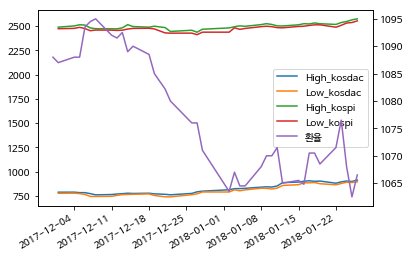

In [11]:
df_finance.plot(secondary_y=['환율'], mark_right=False)

In [ ]:
import matplotlib
matplotlib.matplotlib_fname()